<a href="https://colab.research.google.com/github/Neelesh3/Apple_stock_prediction/blob/main/Stock_Market_Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-10-30'
stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2014-01-02 00:00:00+00:00,0.373992,0.396500,0.399500,0.393000,0.398000,260092000
1,2014-01-03 00:00:00+00:00,0.369512,0.391750,0.398000,0.390500,0.397250,259332000
2,2014-01-06 00:00:00+00:00,0.374464,0.397000,0.400000,0.392000,0.395750,409492000
3,2014-01-07 00:00:00+00:00,0.380595,0.403500,0.405000,0.398250,0.401000,333288000
4,2014-01-08 00:00:00+00:00,0.385782,0.409000,0.411000,0.403500,0.405000,308192000
...,...,...,...,...,...,...,...
2720,2024-10-23 00:00:00+00:00,139.559998,139.559998,142.429993,137.460007,142.029999,285930000
2721,2024-10-24 00:00:00+00:00,140.410004,140.410004,141.350006,138.460007,140.820007,172354900
2722,2024-10-25 00:00:00+00:00,141.539993,141.539993,144.130005,140.800003,140.929993,205122100


In [5]:
ma_100_days = data.Close.rolling(100).mean()

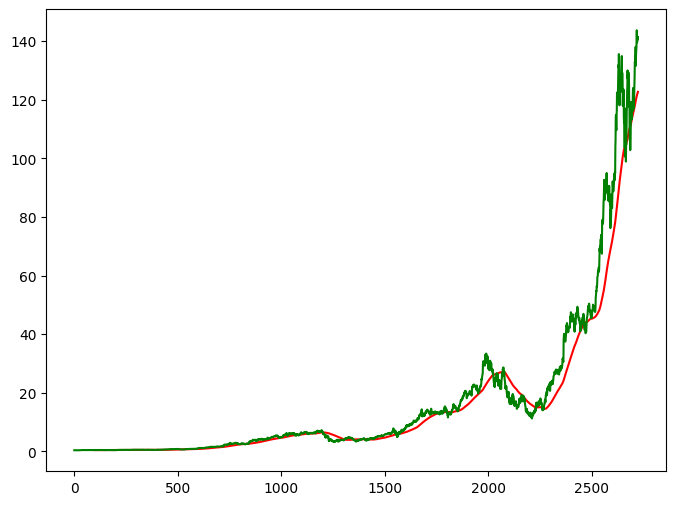

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

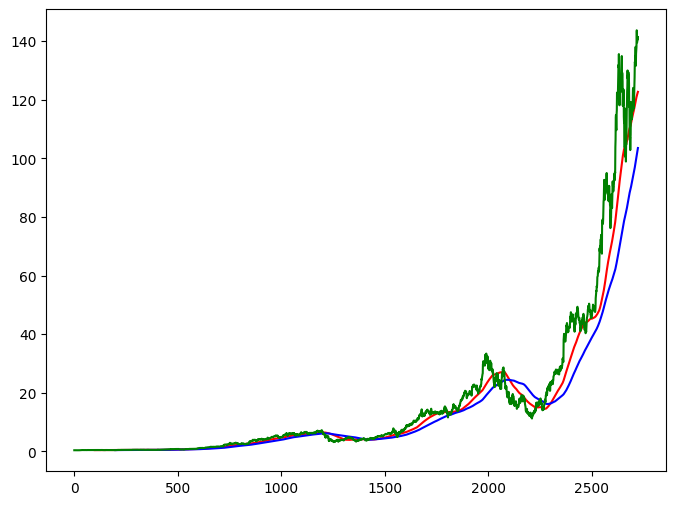

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2180

In [13]:
data_test.shape[0]

545

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - loss: 0.0405
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - loss: 0.0039
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - loss: 0.0045
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - loss: 0.0055
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - loss: 0.0030
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - loss: 0.0033
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - loss: 0.0028
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - loss: 0.0034
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0029
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - loss: 0.0032
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - loss: 0.0040
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 268ms/step - loss: 0.0027
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0029
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - loss: 0.0031
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

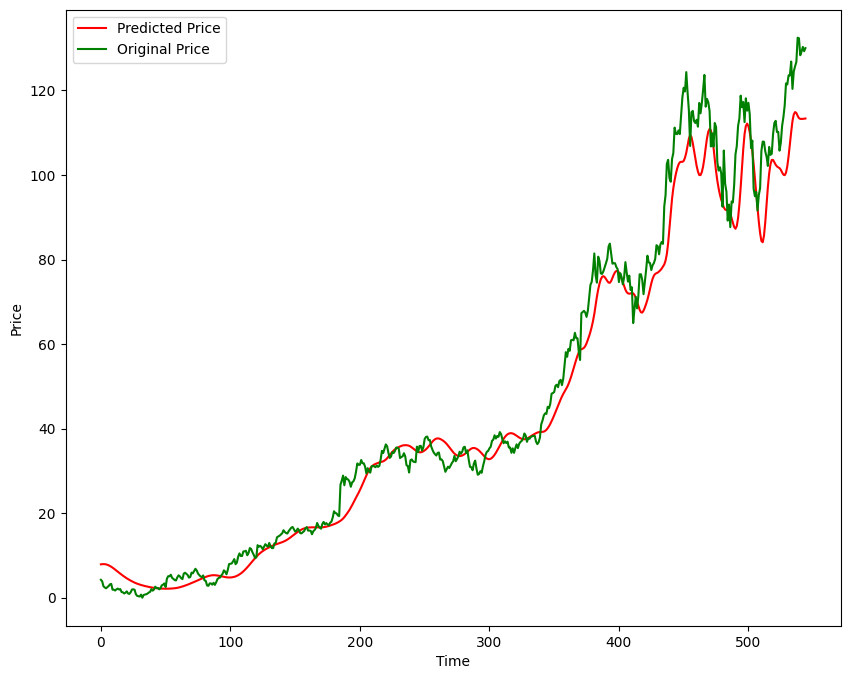

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')